# Goal
There are many EDA notebooks for this project, so the goal of this notebook is not to make full fledged EDA, but to solve any quick doubts I have about the data at different steps of the preparation, without polluting the main notebook.

In [8]:
import pandas as pd
import data_preparation_attempt3 as data_prep
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Reload all modules imported with %aimport every time before executing the Python code typed. https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload explicit
%aimport data_preparation 
pd.set_option('display.max_rows', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
feature_dfs = data_prep.get_feature_dfs()
for item in feature_dfs:
    display(item.head(2))

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [10]:
all_features = feature_dfs.base_xy_df
all_features['date'] = pd.to_datetime(all_features['date'],format='%Y-%M-%d')
all_features['days_since_start'] = ( (all_features['date'] - all_features['date'].min()) // pd.Timedelta('1D') ).astype('int32')
all_features_by_date = all_features.groupby('days_since_start').agg(total_sales=('sales','sum'))

,total_sales
days_since_start,
0,5.272520e+06
1,5.621120e+06
2,5.247330e+06


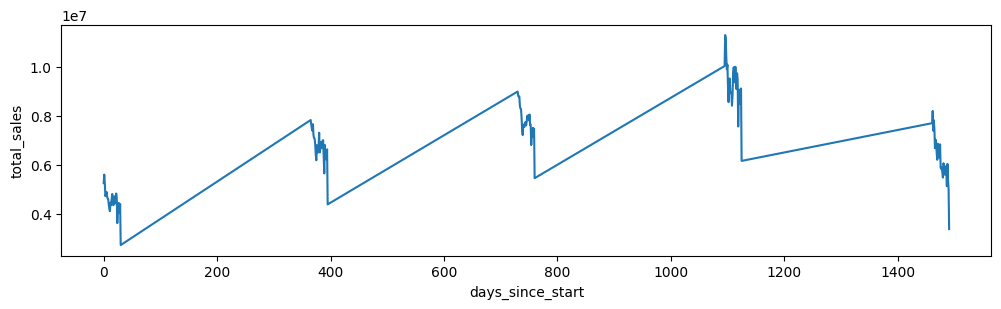

In [24]:
display(all_features_by_date.head(3))
plt.figure(figsize = (12, 3))
ax = sns.lineplot(all_features_by_date,x='days_since_start', y='total_sales')

In [13]:
train_xy_base_df

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [11]:
for item in (train_df, elements_to_predict_df, stores_df, oil_df, transactions_df, special_days_df, sample_submission_df):
    print(item.columns)

Index(['date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
Index(['date', 'store_nbr', 'family', 'onpromotion'], dtype='object')
Index(['city', 'state', 'type', 'cluster'], dtype='object')
Index(['date', 'dcoilwtico'], dtype='object')
Index(['date', 'store_nbr', 'transactions'], dtype='object')
Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')
Index(['id', 'sales'], dtype='object')


In [10]:
display('train:',train_df.head(3))

display('elements to predict:', elements_to_predict_df.head(3))
display('submission example', sample_submission_df.head(3))
display(stores_df.head(3))
display(transactions_df.head(3))

'train:'

,date,store_nbr,family,onpromotion
id,,,,
0,2013-01-01,1,AUTOMOTIVE,0
1,2013-01-01,1,BABY CARE,0
2,2013-01-01,1,BEAUTY,0


'elements to predict:'

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2


'submission example'

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0


,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


In [32]:
pipeline = data_prep.create_pipeline(stores_df, oil_df, transactions_df, special_days_df, window_size=2, verbose=True) #El de date tardo mucho.
processed_train_df = pipeline[:7].fit_transform(train_df[:100000], train_y_truth[:100000])

[Pipeline] .... (step 1 of 7) Processing rename_columns, total=   0.0s
[Pipeline] .. (step 2 of 7) Processing merge_dataframes, total=   0.4s
[Pipeline]  (step 3 of 7) Processing fill_missing_oil_values, total=   0.0s
[Pipeline]  (step 4 of 7) Processing refine_special_day_reason, total=   0.2s
[Pipeline]  (step 5 of 7) Processing replace_date_with_date_related_columns, total=   0.1s
[Pipeline] .. (step 6 of 7) Processing reorder_features, total=   0.0s
[Pipeline] .. (step 7 of 7) Processing prepare_features, total=   1.0s


In [33]:
# We need to monitor memory usage because it could be more than we can handle.
processed_train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 179 entries, oil_price to products_of_family_on_promotion
dtypes: bool(169), float64(2), int32(7), int64(1)
memory usage: 21.1 MB


In [41]:
processed_train_df.products_of_family_on_promotion[processed_train_df.products_of_family_on_promotion.isnull()]
processed_train_df['products_of_family_on_promotion'].drop_duplicates() #They are all zeroes mmm.

0    0
Name: products_of_family_on_promotion, dtype: int64

In [ ]:
PRODUCT FAMILY ON PROMOTION CONTAINS MANY ZEROES

In [34]:
#Lets see the dtypes of each column to see if we can reduce memory usage.
processed_train_df.dtypes
#special day offset lag_1 int 64
#days_since_start lag
#Store cluster lag1
#oil price lag1 all products transactions lag (float64)
#days_since_start

oil_price                                                float64
all_products_transactions                                float64
store_nbr_1.0                                               bool
store_nbr_2.0                                               bool
store_nbr_3.0                                               bool
store_nbr_4.0                                               bool
store_nbr_5.0                                               bool
store_nbr_6.0                                               bool
store_nbr_7.0                                               bool
store_nbr_8.0                                               bool
store_nbr_9.0                                               bool
store_nbr_10.0                                              bool
store_nbr_11.0                                              bool
store_nbr_12.0                                              bool
store_nbr_13.0                                              bool
store_nbr_14.0           

In [16]:
#Store cluster didnt have any nulls but was an int64... Pointless, so converted
#processed_train_df.store_cluster[processed_train_df.store_cluster.isna()]
#compressed = processed_train_df.store_cluster.astype('int32')
#compressed.dtype


Series([], Name: store_cluster, dtype: int64)

In [ ]:
#Pnadas uses floats64 because they can represent up to 6 floating points of precision.
#pd.set_option('precision', 2) can be used to change the display  #df.to_csv(file_name, float_format="%.2f") can be used to print
#df.astype(np.float32) Can be use to change the ytpe

In [28]:
processed_train_df.days_since_start[processed_train_df.days_since_start.isna()]
processed_train_df.days_since_start.astype('int32')

1         0
2         0
3         0
4         0
5         0
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: days_since_start, Length: 99999, dtype: int32